<a href="https://colab.research.google.com/github/annderlau/Contagem_Diamantes_ML/blob/main/Diamante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
 
%matplotlib inline
 
# Importante não mudar essa seed pois sua atividade será avaliada baseada nos resultados dessa seed
np.random.seed(123)

In [ ]:
# 1. Importar no Pandas
df = pd.read_csv('https://github.com/storopoli/ciencia-de-dados/raw/master/notebooks/data/diamonds.csv',
                 index_col=0,
                 dtype={
                     'carat': np.float64,
                     'cut': object,
                     'color': object,
                     'clarity': object,
                     'depth': np.float64,
                     'table': np.float64,
                     'price': np.int64,
                     'x': np.float64,
                     'y': np.float64,
                     'z': np.float64
                 })

In [ ]:
df.price.max()

18823

In [ ]:
# 2.Groupby
# Price = coluna que eu vou agrupar.
# Cut = coluna que eu quero selecionar o valor.
# groupby.Price = coluna que eu quero que agrupe.
mean_price_cut = df.groupby('cut')['price'].mean()
median_price_cut = df.groupby('cut')['price'].median()
 
# Color = coluna que eu vou agrupar.
# Carat = coluna que eu quero selecionar o valor.
# groupby.color = coluna que eu quero que agrupe.
mean_carat_color = df.groupby('color')['carat'].mean()
median_carat_color = df.groupby('color')['carat'].median()

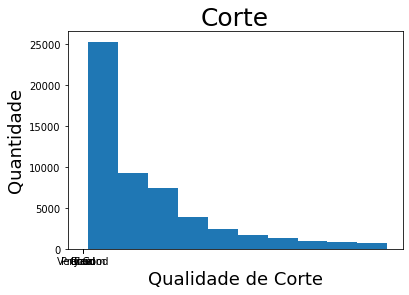

In [ ]:
# 3.Plots
# x1 Removido agora usa o y1.index
plt.hist(df.price)
plt.title('Preço', fontsize=25)
plt.xlabel('Preço', fontsize=18)
plt.ylabel('Quantidade', fontsize=18)
plt.show
 
y1 = pd.Series.value_counts(df.cut)
plt.bar(y1.index, y1, width=0.8)
plt.title('Corte', fontsize=25)
plt.ylabel('Quantidade', fontsize=18)
plt.xlabel('Qualidade de Corte', fontsize=18)
plt.show()

In [ ]:
 # 4. Pré-processamento Scikit-Learn
df_final = pd.get_dummies(df, columns=['cut', 'color', 'clarity'])
 
X = df_final.drop(['price'], axis=1)
y = df_final['price']
# Coloquei um laço de repetição para que o resultado seja igual,
# mas acho que deve estar errado, pq quando não tem o laço o resultado é
# MAE Treino: 742.0239384190813
# MAE Teste: 741.9710443664076
# mas com o laço o resultado é
# MAE Treino: 739.2790890487247
# MAE Teste: 742.5265580440711
# Como de esperado
for dsc in range(0,2): 
  X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)
 
  # 5. Treinamento do Modelo
  clf = LinearRegression()
  clf.fit(X_train, y_train)

In [ ]:
# 5. Treinamento do modelo
y_pred_train = clf.predict(X_train)
mae_train = mean_absolute_error(y_pred_train, y_train)
 
y_pred_test = clf.predict(X_test)
mae_test = mean_absolute_error(y_pred_test, y_test)
 
print(f"MAE Treino: {mae_train}")
print(f"MAE Teste: {mae_test}")

MAE Treino: 739.2790890487247
MAE Teste: 742.5265580440711


In [ ]:
from numpy.testing import assert_approx_equal
 
# Groupbys
assert_approx_equal(mean_price_cut['Good'], 3928.8644)
assert_approx_equal(median_price_cut['Fair'], 3282)
assert_approx_equal(mean_carat_color['D'], 0.657794833)
assert_approx_equal(median_carat_color['H'], 0.9)
# MAEs
assert_approx_equal(mae_train, 739.279089)
assert_approx_equal(mae_test, 742.526558)